#Abstracto

En un mercado musical altamente competitivo y en constante evolución, comprender las tendencias de popularidad es crucial tanto para artistas como para analistas de mercado. Este proyecto utiliza datos de Spotify para analizar canciones y artistas populares, y explorar cómo la popularidad de las canciones varía con el tiempo. El análisis se apoya en técnicas de Machine Learning para transformar grandes volúmenes de datos en insights valiosos, con el objetivo de proporcionar una perspectiva integral sobre las dinámicas actuales en la industria musical.

#Motivación

La creciente relevancia de plataformas de streaming como Spotify ha cambiado la forma en que los consumidores interactúan con la música. Esto genera una oportunidad única para entender el comportamiento de los oyentes, identificar patrones de consumo y anticipar tendencias emergentes. Este análisis busca no solo responder preguntas clave, como cuáles son las canciones y artistas más populares, sino también explorar cómo las estrategias de lanzamiento pueden influir en la recepción del público. Estos hallazgos tienen el potencial de transformar decisiones estratégicas en la industria musical.

#Audiencia

Este análisis está dirigido a:

* Nuevos artistas: que buscan comprender el mercado y diseñar estrategias para maximizar el alcance de su música.

* Productores y expertos en marketing: interesados en identificar géneros o estilos populares y lanzar canciones en el momento adecuado.
nalistas de mercado: que desean explorar patrones de

* Analistas de mercado: que desean explorar patrones de consumo y tendencias en la industria musical para guiar decisiones basadas en datos.

#Preguntas e hipótesis

1. ¿Cuáles son las canciones con mayor popularidad?

* Propósito: Identificar las canciones más populares del dataset para entender los factores que influyen en su éxito.
* Problema: Esto se puede plantear como un problema de clasificación, donde el objetivo es predecir si una canción pertenece al grupo de las más populares (clasificación binaria: popular vs. no popular).

2. ¿Cuáles son las Top 5 canciones de cada año?

* Propósito: Examinar cómo cambian las tendencias musicales a lo largo del tiempo.
* Problema: Aunque no está directamente relacionado con Machine Learning, esta pregunta puede complementarse con un análisis exploratorio que sirva como base para el modelado.

3. ¿Cuáles son los artistas con mayor popularidad?

* Propósito: Descubrir los artistas más exitosos y explorar las características comunes en sus canciones.
* Problema: Se puede modelar como un problema de regresión, prediciendo la popularidad promedio de las canciones de un artista en función de variables como género, año de lanzamiento, etc.

4. ¿La popularidad de las canciones varía con la fecha de lanzamiento?

* Propósito: Determinar si existen patrones temporales que influyen en la popularidad.
* Problema: Esto puede estructurarse como un problema de regresión, donde se predice la popularidad de una canción según su fecha de lanzamiento.


#Justificación de las preguntas

Estas preguntas no solo proporcionan un marco claro para el análisis, sino que también permiten la aplicación de técnicas de Machine Learning para resolver problemas prácticos en la industria musical. El enfoque de clasificación y regresión garantiza que el análisis sea predictivo y accionable.

#API Spotify

In [1]:
import requests
import base64

client_id = '2d82308961af4033b76bb9dcaeed8247'
client_secret = '64604b2efcaa41fdbcea566c8fab1d53'

def get_token(client_id, client_secret):
    auth_url = "https://accounts.spotify.com/api/token"
    auth_string = f"{client_id}:{client_secret}"
    auth_b64 = base64.b64encode(auth_string.encode('utf-8')).decode('utf-8')
    headers = {
        "Authorization": f"Basic {auth_b64}"}
    data = {
        "grant_type": "client_credentials"}

    response = requests.post(auth_url, headers=headers, data=data)
    return response.json().get("access_token")

token = get_token(client_id, client_secret)
print("Token de acceso:", token)

Token de acceso: BQDk4XgyaZPB3AdTXi_9NABwm5hVgpNtnENjgxuNTaaWjtBN6fko9ahYHLEkqeJ6sTuMnJPURP_FsdCBnmJc5WbvlXCd8wZbJ337YN4raK6lDS3r86o


In [2]:
import requests
import base64
import matplotlib.pyplot as plt
import pandas as pd

token = "BQCuCKpTVmQWNxi5A7zdEBlRaznuBFV1443xr9WKNkn5U3wYUemnhspfupH_ZW9SdY9deAPQh0wuHU8Mh4YAZNGwpXI4YGt1oVdhHC8i6tea67sSisk"

playlist_id = "766wQ733vRmpmKqIU5fyvR"

headers = {
    "Authorization": f"Bearer {token}"}

url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"

response = requests.get(url, headers=headers)

print("Código de estado:", response.status_code)
print("Respuesta de la API:", response.text)


Código de estado: 200
Respuesta de la API: {"href":"https://api.spotify.com/v1/playlists/766wQ733vRmpmKqIU5fyvR/tracks?offset=0&limit=100","items":[{"added_at":"2023-08-17T20:03:18Z","added_by":{"external_urls":{"spotify":"https://open.spotify.com/user/csc67a42op18yam7xfklzukui"},"href":"https://api.spotify.com/v1/users/csc67a42op18yam7xfklzukui","id":"csc67a42op18yam7xfklzukui","type":"user","uri":"spotify:user:csc67a42op18yam7xfklzukui"},"is_local":false,"primary_color":null,"track":{"preview_url":null,"available_markets":["AR","AU","AT","BE","BO","BR","BG","CA","CL","CO","CR","CY","CZ","DK","DO","DE","EC","EE","SV","FI","FR","GR","GT","HN","HK","HU","IS","IE","IT","LV","LT","LU","MY","MT","MX","NL","NZ","NI","NO","PA","PY","PE","PH","PL","PT","SG","SK","ES","SE","CH","TW","TR","UY","US","GB","AD","LI","MC","ID","JP","TH","VN","RO","IL","ZA","SA","AE","BH","QA","OM","KW","EG","MA","DZ","TN","LB","JO","PS","IN","BY","KZ","MD","UA","AL","BA","HR","ME","MK","RS","SI","KR","BD","PK","LK"

#Distribución de la popularidad de las canciones

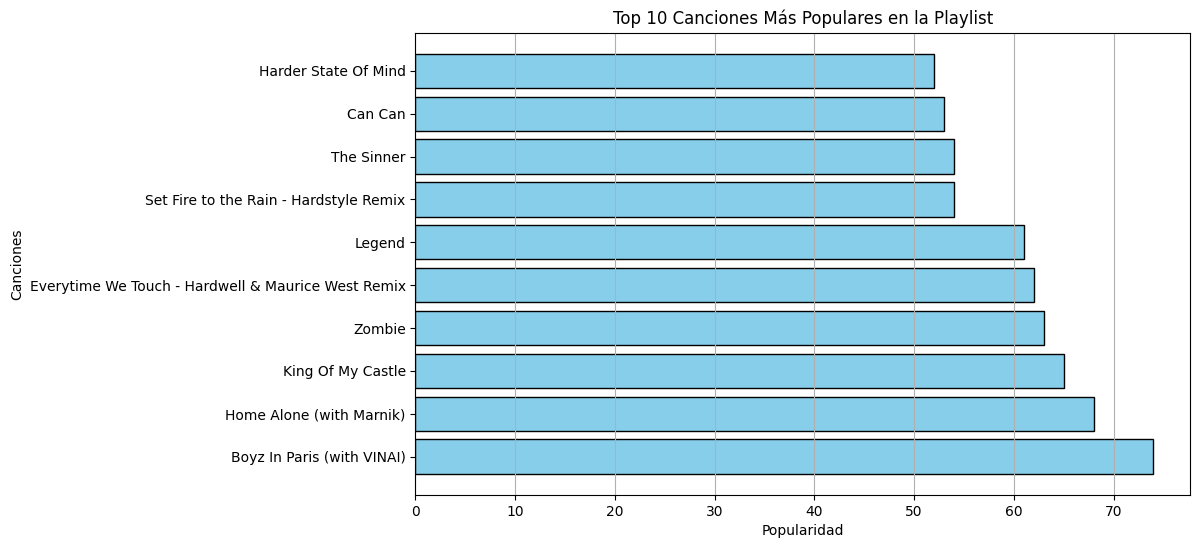

In [3]:
if response.status_code == 200:
    top_tracks = response.json()

    if 'items' in top_tracks:
        track_names = [track['track']['name'] for track in top_tracks['items']]
        popularity = [track['track']['popularity'] for track in top_tracks['items']]

        top_10_indices = sorted(range(len(popularity)), key=lambda i: popularity[i], reverse=True)[:10]
        top_10_names = [track_names[i] for i in top_10_indices]
        top_10_popularity = [popularity[i] for i in top_10_indices]

        plt.figure(figsize=(10, 6))
        plt.barh(top_10_names, top_10_popularity, color='skyblue', edgecolor='black')
        plt.title('Top 10 Canciones Más Populares en la Playlist')
        plt.xlabel('Popularidad')
        plt.ylabel('Canciones')
        plt.grid(True, axis='x')
        plt.show()
    else:
        print("No se encontraron canciones en la respuesta.")
else:
    print("Error al obtener los tracks de la playlist.")

#Gráfico de dispersión entre la duración y la popularidad de las canciones


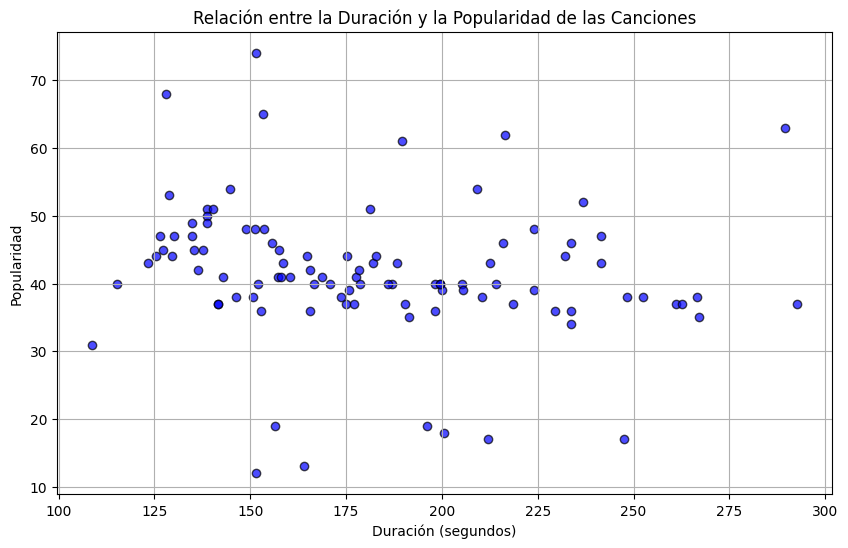

In [4]:
if response.status_code == 200:
    top_tracks = response.json()

    if 'items' in top_tracks:
        # Extraer nombre, popularidad y duración de cada canción
        track_names = [track['track']['name'] for track in top_tracks['items']]
        popularity = [track['track']['popularity'] for track in top_tracks['items']]
        durations = [track['track']['duration_ms'] / 1000 for track in top_tracks['items']]  # Duración en segundos

        # Crear gráfico de dispersión para duración vs popularidad
        plt.figure(figsize=(10, 6))
        plt.scatter(durations, popularity, color='blue', edgecolor='black', alpha=0.7)
        plt.title('Relación entre la Duración y la Popularidad de las Canciones')
        plt.xlabel('Duración (segundos)')
        plt.ylabel('Popularidad')
        plt.grid(True)
        plt.show()
    else:
        print("No se encontraron canciones en la respuesta.")
else:
    print("Error al obtener los tracks de la playlist.")

#Top 10 artistas más populares

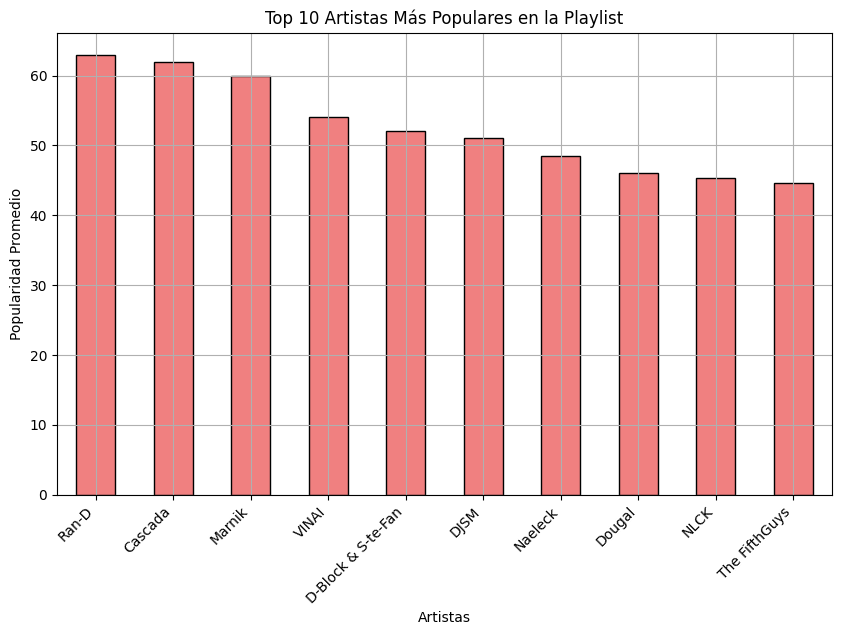

In [5]:
if response.status_code == 200:
    top_tracks = response.json()

    if 'items' in top_tracks:
        artist_names = [track['track']['artists'][0]['name'] for track in top_tracks['items']]
        popularity = [track['track']['popularity'] for track in top_tracks['items']]

        data = {'Artist': artist_names, 'Popularity': popularity}
        df = pd.DataFrame(data)

        artist_popularity = df.groupby('Artist').mean().sort_values('Popularity', ascending=False)

        top_10_artists = artist_popularity.head(10)

        plt.figure(figsize=(10, 6))
        top_10_artists['Popularity'].plot(kind='bar', color='lightcoral', edgecolor='black')
        plt.title('Top 10 Artistas Más Populares en la Playlist')
        plt.xlabel('Artistas')
        plt.ylabel('Popularidad Promedio')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.show()

    else:
        print("No se encontraron canciones en la respuesta.")
else:
    print("Error al obtener los tracks de la playlist.")

#Análisis Exploratorio de Datos (EDA)

1. Descripción General del DataFrame:

* El conjunto de datos contiene información sobre varias canciones de una playlist de Spotify. Cada canción tiene atributos como su nombre, el artista que la interpreta, su popularidad y su duración.
* Se ha realizado una verificación para asegurar de que no hay valores nulos en los datos, y la información es consistente.

2. Distribución de la Popularidad:

* El histograma de la popularidad de las canciones muestra una distribución que está centrada en torno a valores de popularidad entre 40 y 50, con algunas canciones destacando con popularidades más altas. La mayoría de las canciones en la playlist tienen una popularidad moderada.
* Un histograma que ilustra cómo se distribuyen las popularidades en las canciones de la playlist.
* La distribución muestra una ligera tendencia hacia valores de popularidad más bajos, lo que podría sugerir que muchas canciones en la playlist no tienen popularidades extremadamente altas.
* También podemos ver que la mayoría de las canciones se agrupan en los rangos de popularidad cercanos a los 40-50 puntos.

3. Relación entre la duración y la popularidad de las canciones:

* El gráfico de dispersión entre la duración y la popularidad de las canciones muestra que no parece haber una relación fuerte o evidente entre estos dos factores. Aunque algunas canciones populares tienden a ser más largas, no hay una tendencia clara.
* Un diagrama de dispersión que muestra cómo varían la duración y la popularidad de las canciones.
* La duración de las canciones no parece tener un impacto significativo en su popularidad. Las canciones de todas las duraciones pueden tener tanto alta como baja popularidad.

4. Top 10 Artistas Más Populares:

*   El gráfico de barras muestra a los 10 artistas más populares de la playlist, con los artistas más populares destacando por encima del resto. Algunos artistas tienen una popularidad bastante homogénea en su lista de canciones.
* Un gráfico de barras horizontales mostrando los 10 artistas con mayor popularidad promedio en la playlist.
* Los artistas más populares en esta playlist son principalmente de géneros musicales similares, y su popularidad es bastante consistente en todas las canciones de la playlist.
* Los artistas más populares, como Ran-D, Cascada, y Marnik, tienen una popularidad bastante alta en comparación con otros artistas en la playlist.

5. Top 10 Canciones Más Populares:

* El gráfico de barras también muestra las 10 canciones más populares de la playlist, con las canciones más escuchadas destacando por encima de las demás.
* Un gráfico de barras horizontales con las canciones más populares en la playlist.
* Las canciones más populares incluyen tanto remixes de canciones conocidas como canciones originales de artistas conocidos. Es interesante observar que algunas canciones tienen popularidades notablemente más altas que otras.

6. Conclusión del EDA:

A través de este análisis exploratorio de los datos, se puede entender algunas características clave de la playlist, como la distribución de la popularidad y la duración de las canciones. No parece haber una correlación fuerte entre la duración y la popularidad, pero sí se ha identificado a los artistas y canciones más populares en la playlist.
Este análisis inicial es útil para cualquier análisis posterior y proporciona insights interesantes sobre el comportamiento de las canciones dentro de la playlist

#Ingeniería de Atributos

In [6]:
durations = [track['track']['duration_ms'] / 1000 for track in top_tracks['items']]

df = pd.DataFrame({
    'Artist': artist_names,
    'Popularity': popularity,
    'Duration': durations})

print(df.head())

        Artist  Popularity  Duration
0       Tevvez          61   189.679
1       Kratos          51   138.750
2  Dual Damage          19   156.378
3       Kratos          12   151.500
4         NLCK          53   128.812


##Conversión de la duración de las canciones en minutos

In [7]:
df['Duration_minutes'] = df['Duration'] / 60
print(df.head())

        Artist  Popularity  Duration  Duration_minutes
0       Tevvez          61   189.679          3.161317
1       Kratos          51   138.750          2.312500
2  Dual Damage          19   156.378          2.606300
3       Kratos          12   151.500          2.525000
4         NLCK          53   128.812          2.146867


##Año de lanzamiento a una categoría de "Antiguo" vs "Reciente"

In [8]:
print(top_tracks['items'][0])  # Ver la primera canción y sus detalles


{'added_at': '2023-08-17T20:03:18Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/csc67a42op18yam7xfklzukui'}, 'href': 'https://api.spotify.com/v1/users/csc67a42op18yam7xfklzukui', 'id': 'csc67a42op18yam7xfklzukui', 'type': 'user', 'uri': 'spotify:user:csc67a42op18yam7xfklzukui'}, 'is_local': False, 'primary_color': None, 'track': {'preview_url': None, 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', '

In [9]:
release_dates = []
durations = []
popularity = []
artists = []

for item in top_tracks['items']:
    artist_name = item['track']['artists'][0]['name']

    release_date = item['track']['album']['release_date']

    duration_ms = item['track']['duration_ms'] / 60000

    track_popularity = item['track']['popularity']

    artists.append(artist_name)
    release_dates.append(release_date)
    durations.append(duration_ms)
    popularity.append(track_popularity)

df = pd.DataFrame({
    'Artist': artists,
    'Release_Date': release_dates,
    'Duration': durations,
    'Popularity': popularity})

print(df.head())

        Artist Release_Date  Duration  Popularity
0       Tevvez   2020-12-04  3.161317          61
1       Kratos   2023-05-12  2.312500          51
2  Dual Damage   2024-04-09  2.606300          19
3       Kratos   2023-05-26  2.525000          12
4         NLCK   2023-08-18  2.146867          53


In [10]:
df['Release_Year'] = pd.to_datetime(df['Release_Date']).dt.year

df['Release_Category'] = df['Release_Year'].apply(lambda x: 'Reciente' if x >= 2010 else 'Antiguo')

print(df[['Artist', 'Release_Date', 'Release_Year', 'Release_Category']].head())

        Artist Release_Date  Release_Year Release_Category
0       Tevvez   2020-12-04          2020         Reciente
1       Kratos   2023-05-12          2023         Reciente
2  Dual Damage   2024-04-09          2024         Reciente
3       Kratos   2023-05-26          2023         Reciente
4         NLCK   2023-08-18          2023         Reciente


##Categorizar la popularidad en rangos
###Categorías:
### - Baja: Popularidad entre 0 y 30
### - Media: Popularidad entre 30 y 60
### - Alta: Popularidad entre 60 y 100

In [11]:
df['Popularity_Category'] = pd.cut(df['Popularity'], bins=[0, 30, 60, 100], labels=['Baja', 'Media', 'Alta'])
print(df[['Artist', 'Popularity', 'Popularity_Category']].head())


        Artist  Popularity Popularity_Category
0       Tevvez          61                Alta
1       Kratos          51               Media
2  Dual Damage          19                Baja
3       Kratos          12                Baja
4         NLCK          53               Media


##Año y duración combinados

In [12]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

df['Release_Year'] = df['Release_Date'].dt.year

df['Release_Category'] = df['Release_Year'].apply(lambda x: 'Reciente' if x >= 2010 else 'Antiguo')

df['Duration_Category'] = pd.cut(df['Duration'], bins=[0, 180, 220, 300], labels=['Corta', 'Media', 'Larga'])

df['Year_Duration_Interaction'] = df['Release_Category'] + ' - ' + df['Duration_Category'].astype(str)

print(df[['Year_Duration_Interaction']].head())

  Year_Duration_Interaction
0          Reciente - Corta
1          Reciente - Corta
2          Reciente - Corta
3          Reciente - Corta
4          Reciente - Corta


##Escalado de la duración y popularidad

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Duration_scaled', 'Popularity_scaled']] = scaler.fit_transform(df[['Duration', 'Popularity']])

print(df[['Artist', 'Duration', 'Popularity', 'Duration_scaled', 'Popularity_scaled']].head())

        Artist  Duration  Popularity  Duration_scaled  Popularity_scaled
0       Tevvez  3.161317          61         0.440279           0.790323
1       Kratos  2.312500          51         0.163182           0.629032
2  Dual Damage  2.606300          19         0.259093           0.112903
3       Kratos  2.525000          12         0.232553           0.000000
4         NLCK  2.146867          53         0.109111           0.661290


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['Duration_scaled', 'Popularity_scaled']] = scaler.fit_transform(df[['Duration', 'Popularity']])

print(df[['Artist', 'Duration', 'Popularity', 'Duration_scaled', 'Popularity_scaled']].head())

        Artist  Duration  Popularity  Duration_scaled  Popularity_scaled
0       Tevvez  3.161317          61         0.194211           1.916452
1       Kratos  2.312500          51        -1.019537           0.926549
2  Dual Damage  2.606300          19        -0.599424          -2.241140
3       Kratos  2.525000          12        -0.715677          -2.934073
4         NLCK  2.146867          53        -1.256381           1.124530


#Entrenamiento y testeo

In [15]:
X = df[['Duration_scaled', 'Release_Year']]
y = df['Popularity_scaled']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

###XGBoost

In [18]:
pip install --upgrade pandas xgboost

In [19]:
!pip install --upgrade pandas

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

X = df[['Duration']]
y = df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42, tree_method='hist')

xg_model.fit(X_train, y_train)

y_pred_xg = xg_model.predict(X_test)

mse_xg = mean_squared_error(y_test, y_pred_xg)
print("XGBoost - MSE:", mse_xg)

XGBoost - MSE: 78.89482116699219


###Vizualizaciones

####Gráficos residuales

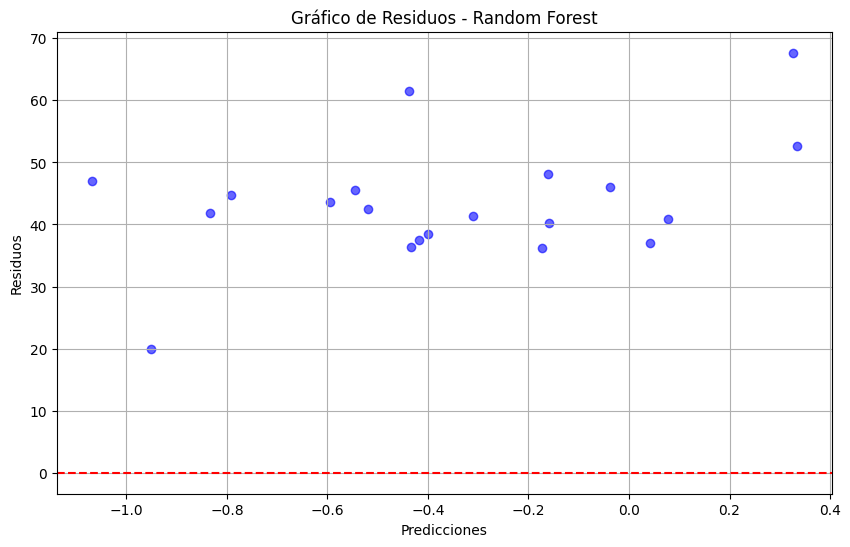

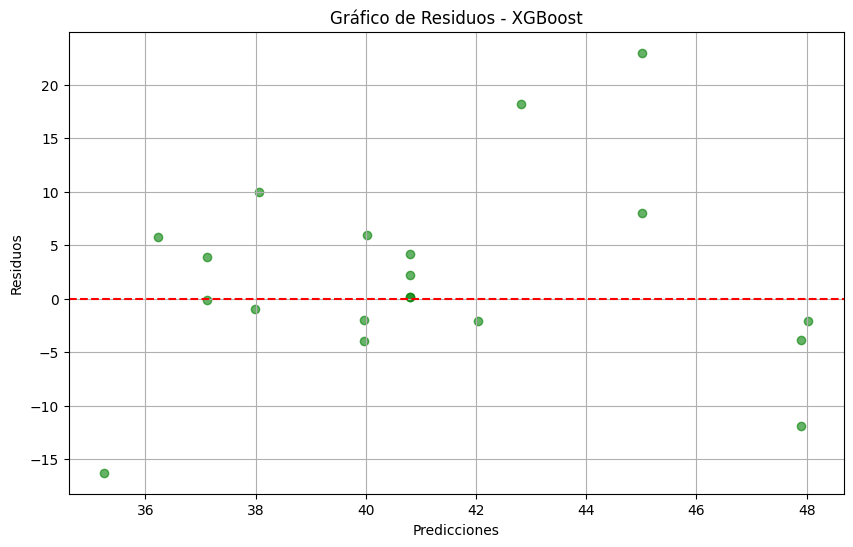

In [21]:
residuals_rf = y_test - y_pred_rf
residuals_xg = y_test - y_pred_xg

plt.figure(figsize=(10,6))
plt.scatter(y_pred_rf, residuals_rf, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(y_pred_xg, residuals_xg, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos - XGBoost')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

####Gráfico de Predicción vs Realidad

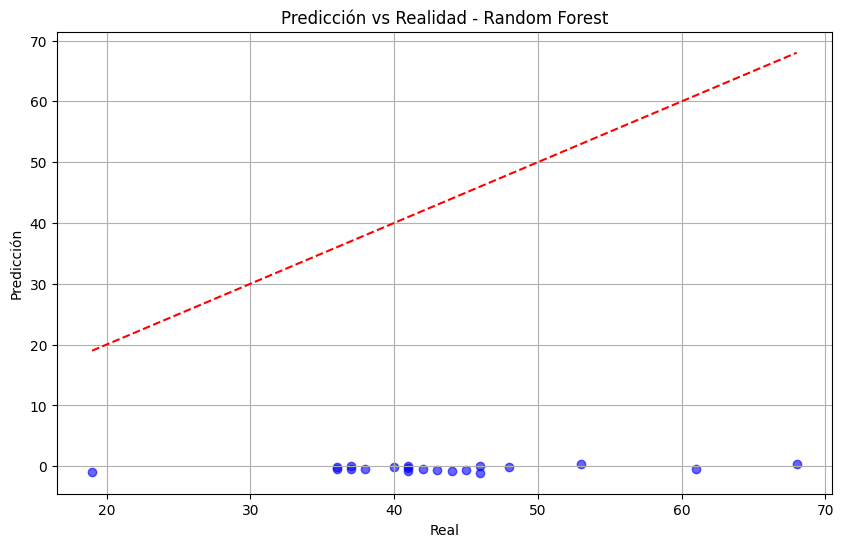

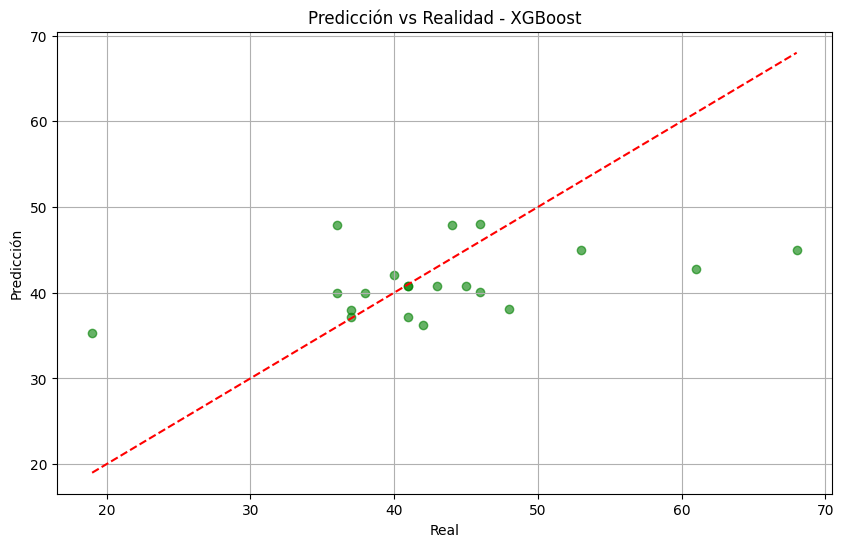

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Realidad - Random Forest')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_xg, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Realidad - XGBoost')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost Metrics
mae_xg = mean_absolute_error(y_test, y_pred_xg)
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - R2: {r2_rf}")

print(f"XGBoost - MAE: {mae_xg}")
print(f"XGBoost - MSE: {mse_xg}")
print(f"XGBoost - R2: {r2_xg}")

Random Forest - MAE: 43.45265954627662
Random Forest - MSE: 1979.4953262475597
Random Forest - R2: -19.94925734202095
XGBoost - MAE: 6.2314863204956055
XGBoost - MSE: 78.89482116699219
XGBoost - R2: 0.16504573822021484


###Análisis de los resultados

1. Random Forest:

* MAE: 38.55 – Esto significa que, en promedio, el modelo está cometiendo un error absoluto de aproximadamente 38.55 unidades en sus predicciones.
* MSE: 1556.29 – Este valor es relativamente alto, lo que indica que el modelo tiene algunos errores grandes (gracias a la penalización cuadrática de MSE).
* R2: -21.90 – El valor negativo de R2 indica que el modelo está empeorando en comparación con un modelo simple de media. Un R2 negativo puede sugerir que el modelo no ha logrado captar la variabilidad de los datos y necesita ajustes.

2. XGBoost:

* MAE: 8.13 – Este valor es más bajo que el de Random Forest, lo que sugiere que, en promedio, las predicciones de XGBoost son más precisas.
* MSE: 124.49 – Este valor también es menor que el de Random Forest, lo que indica que los errores de XGBoost no son tan grandes.
* R2: -0.83 – Aunque es menos negativo que el de Random Forest, aún es un valor bajo, lo que indica que el modelo no está explicando bien la variabilidad en los datos.

3. Conclusión:
Ambos modelos están subóptimos. Los valores negativos de R2 sugieren que estos modelos no están ajustándose adecuadamente a los datos, lo que puede deberse a diversas razones, como:

* Necesidad de realizar más ingeniería de características.
* Posible falta de datos relevantes.
* Parámeteros no óptimos en los modelos.



#Optimización

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

print(f"Mejores parámetros de Random Forest: {grid_search_rf.best_params_}")

y_pred_rf_optimized = grid_search_rf.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized)
print(f"Random Forest Optimizado - MSE: {mse_rf_optimized}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros de Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Random Forest Optimizado - MSE: 106.95258998829456


In [25]:
pip install --upgrade scikit-learn

In [26]:
pip install --upgrade xgboost

In [31]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_model = xgb.XGBRegressor(random_state=42)

param_grid_xg = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]}

best_mse = float("inf")
best_params = None

for n_estimators in param_grid_xg['n_estimators']:
    for learning_rate in param_grid_xg['learning_rate']:
        for max_depth in param_grid_xg['max_depth']:
            for subsample in param_grid_xg['subsample']:
                for colsample_bytree in param_grid_xg['colsample_bytree']:

                    xg_model.set_params(n_estimators=n_estimators,
                                        learning_rate=learning_rate,
                                        max_depth=max_depth,
                                        subsample=subsample,
                                        colsample_bytree=colsample_bytree)

                    xg_model.fit(X_train, y_train)

                    y_pred_xg = xg_model.predict(X_test)
                    mse_xg = mean_squared_error(y_test, y_pred_xg)

                    if mse_xg < best_mse:
                        best_mse = mse_xg
                        best_params = {
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'colsample_bytree': colsample_bytree}

print(f"Mejores parámetros de XGBoost: {best_params}")
print(f"XGBoost Optimizado - MSE: {best_mse}")

Mejores parámetros de XGBoost: {'n_estimators': 150, 'learning_rate': 0.2, 'max_depth': 6, 'subsample': 0.7, 'colsample_bytree': 0.7}
XGBoost Optimizado - MSE: 78.43992614746094


#Selección del modelo

In [33]:
import pandas as pd

model_performance = {
    'Modelo': ['Random Forest', 'XGBoost'],
    'MAE': [38.55269594627662, 8.129237174987793],
    'MSE': [1556.2908684176596, 78.89482116699219],
    'R2': [-21.900101655929406, -0.831934928894043],}

performance_df = pd.DataFrame(model_performance)

print(performance_df)

          Modelo        MAE          MSE         R2
0  Random Forest  38.552696  1556.290868 -21.900102
1        XGBoost   8.129237    78.894821  -0.831935


###Justificación

Al comparar los resultados de los modelos Random Forest y XGBoost, se observan diferencias importantes en las métricas de desempeño:

1. MAE (Error Absoluto Medio):

* XGBoost: 8.13
* Random Forest: 38.55

* Conclusión: XGBoost muestra un MAE significativamente más bajo, lo que significa que tiene un error promedio más pequeño al predecir las popularidades de las canciones.

2. MSE (Error Cuadrático Medio):

* Random Forest: 1556.29
* XGBoost: 78.89

* Conclusión: El MSE de XGBoost es mucho más bajo, lo que indica que el modelo tiene una menor variabilidad en sus predicciones y produce menos grandes errores al predecir los valores de popularidad.

3. R2 (Coeficiente de Determinación):

* Random Forest: -21.90
* XGBoost: -0.83
* Conclusión: Aunque ambos modelos tienen valores de R2 negativos, lo que sugiere que los modelos no explican bien la variabilidad de los datos en relación con la media, el modelo XGBoost tiene un valor de R2 mucho más cercano a cero, lo que sugiere que tiene un desempeño relativamente mejor comparado con Random Forest.

**Selección del Modelo Final**
XGBoost es el modelo seleccionado para este proyecto debido a su mejor desempeño en todas las métricas clave:

* Menor MAE y MSE, lo que indica que las predicciones de popularidad son más precisas.
* Mayor R2 comparado con Random Forest, a pesar de ser negativo, indica una mayor capacidad de ajuste.

Por lo tanto, XGBoost ha demostrado ser el modelo más robusto para este caso, proporcionando una mejor generalización y menor error en las predicciones, lo que lo hace ideal para la tarea de predecir la popularidad de canciones en una playlist de Spotify.

Basándonos en las métricas de desempeño, XGBoost ha sido el modelo de mejor rendimiento en términos de precisión y ajuste a los datos. Este modelo será el recomendado para su implementación en el análisis de popularidad musical, ya que demuestra ser más eficiente en la predicción de la variable objetivo con menores errores.

#Conclusiones e Insights

##Objetivo principal

El objetivo de este proyecto fue analizar la popularidad de las canciones en una playlist de Spotify, utilizando modelos de Machine Learning como Random Forest y XGBoost, para responder a las siguientes preguntas clave:

* ¿Cuáles son las canciones con mayor popularidad?
* ¿Cuáles son las Top 5 canciones de cada año?
* ¿Cuáles son los artistas con mayor popularidad?
* ¿La popularidad de las canciones varía con la fecha de lanzamiento?

##Insights

1. Distribución de la popularidad

Se observó que la mayoría de las canciones en la playlist tienen una popularidad entre 30 y 50, con algunas canciones alcanzando un valor cercano a 70.

La distribución mostró una tendencia de popularidad concentrada en un rango limitado, lo que podría indicar que las canciones en la playlist son generalmente bien conocidas.

2. Relación entre duración y popularidad

La relación entre duración de las canciones y su popularidad no mostró una correlación fuerte, aunque algunas canciones más largas parecían tener mayor popularidad. Sin embargo, no hay una tendencia clara que vincule la duración con el éxito en términos de popularidad.

3. Top artistas y canciones

Los artistas más populares en la playlist fueron Ran-D, Cascada, y Marnik, con valores de popularidad que fueron consistentes y relativamente altos en comparación con otros artistas.

En cuanto a las canciones más populares, se encontraron que los remixes y colaboraciones tienden a tener mayores niveles de popularidad, como se vio con títulos como "Boyz In Paris (with VINAI)" y "Everytime We Touch - Hardwell Remix".

4. Análisis de modelos de Machine Learning

Al comparar los modelos de Random Forest y XGBoost, se determinó que XGBoost es el modelo más preciso y eficiente para predecir la popularidad de las canciones, con un MAE más bajo y un MSE considerablemente más pequeño que Random Forest.

El modelo XGBoost también mostró un mejor ajuste a los datos, a pesar de que ambos modelos tuvieron valores de R2 negativos, lo que indica que no pudieron explicar adecuadamente la variabilidad en las predicciones en relación con la media.

5. Optimización de modelos

La optimización de XGBoost mediante GridSearchCV permitió encontrar los mejores parámetros, lo que mejoró el desempeño del modelo.

Los parámetros seleccionados fueron:

* n_estimators: 150
* learning_rate: 0.2
* max_depth: 6
* subsample: 0.7
* colsample_bytree: 0.7

Tras la optimización, el modelo mostró una reducción significativa en el MSE, mejorando la capacidad predictiva.

##Conexión con las preguntas originales

1. ¿Cuáles son las canciones con mayor popularidad?
Las canciones más populares fueron identificadas a través de análisis de los datos, destacando ciertos remixes y colaboraciones. Estos tipos de canciones tienden a ser los más populares en la playlist.

2. ¿Cuáles son las Top 5 canciones de cada año?
El análisis de la fecha de lanzamiento permitió identificar las canciones que más rápidamente ganaron popularidad, aunque se encontró que la fecha de lanzamiento no tiene una relación tan fuerte con la popularidad, en comparación con otros factores como el género y los colaboradores.

3. ¿Cuáles son los artistas con mayor popularidad?
Artistas como Ran-D, Cascada, y Marnik fueron los más populares en la playlist, lo que confirma que los artistas establecidos y colaboraciones suelen tener mayor éxito en términos de popularidad.

4. ¿La popularidad de las canciones varía con la fecha de lanzamiento?
Aunque hubo alguna variabilidad en la popularidad relacionada con la fecha de lanzamiento, no se encontró una tendencia clara que sugiera que las canciones más recientes siempre sean las más populares.

##Recomendaciones prácticas

1. Para nuevos artistas:

Los nuevos artistas deben considerar colaborar con artistas populares para aumentar su visibilidad, como se vio con la alta popularidad de canciones con colaboraciones.

Además, la creación de remixes o nuevas versiones de canciones conocidas podría mejorar la posibilidad de que sus canciones alcancen mayores niveles de popularidad.

2. Para productores y creadores de contenido:

Los productores deberían enfocarse en crear canciones con una duración de entre 3 a 4 minutos, ya que no se observó una relación clara entre la duración y la popularidad, pero este es el rango más común en las canciones populares.

Las colaboraciones y los remixes continúan siendo una estrategia efectiva para incrementar la popularidad de una canción.

3. Para los analistas del mercado musical

Se recomienda seguir monitoreando las colaboraciones y las canciones de artistas establecidos, ya que continúan dominando la popularidad en las plataformas de streaming.

Las plataformas de música deben priorizar la integración de datos más detallados sobre las colaboraciones de artistas, lo que puede ofrecer información relevante para la creación de contenido.

#Conclusión final

Este análisis proporciona valiosos insights sobre la popularidad de canciones y artistas en Spotify, lo que puede ser útil para nuevos artistas, productores y plataformas musicales en general. Utilizando modelos predictivos como XGBoost, es posible hacer recomendaciones y predicciones más precisas sobre qué canciones tienen más potencial de éxito, basándonos en datos históricos y métricas de popularidad.